In [27]:
from standardInclude import *

In [28]:
fs = {"Run 2C":r.TFile("./data/allcalos/results_Run2C_caloPositionHists.root"),
      "EndGame":r.TFile("./data/allcalos/results_endgame_caloPositionHists.root"),
      "9day":r.TFile("./data/allcalos/results_9day_caloPositionHists.root")
     }
fs["EndGame"].ls()

TFile**		./data/allcalos/results_endgame_caloPositionHists.root	
 TFile*		./data/allcalos/results_endgame_caloPositionHists.root	
  KEY: TDirectoryFile	verticalPosition;1	verticalPosition (CaloHitPositions) folder


In [29]:
def fitfunc(choice, fitrange, params=None):
    tlow, thigh = fitrange
    if(choice is 0):
        func = r.TF1("func","[0] + [1] - [1]/(TMath::Exp([2]*x)) + [3]*(x)",tlow,thigh)
        func.SetParNames("C", "A", "#tau", "m")
        if(params is None):
            paramVec = [1,10,1,-0.0001,10]
        else:
            paramVec = params
        for i,xi in enumerate(paramVec):
            func.SetParameter(i,xi)
        return (func,paramVec)
    elif(choice is 1):
        func = r.TF1("func","pol1",tlow,thigh)
        func.SetParNames("C", "m")
        if(params is None):
            params = [1,-0.00001]
        for i,xi in enumerate(params):
            func.SetParameter(i,xi)
        return (func, params)
    else:
        print("Invalid choice")
        return -1

In [36]:
datasetfits = {}
datasetslopes = {}
datasetslopeErrs = {}
for name in fs:
    print("Starting", name)
    f = fs[name]
    allFitResults = {}
    slopes = []
    slopeErrs = []
    for calo in range(1,25):
        print("    Calo ", calo)
        #randclusters = f.Get("verticalPosition/randclusters"+str(calo)).Clone()
        if("EndGame" not in name):
            randclusters = f.Get("clusters/randclusters"+str(calo)).Clone()
        else:
            randclusters = f.Get("verticalPosition/randclusters"+str(calo)).Clone()
        randclusters.Rebin3D(10,1,1)
        randclusters.GetYaxis().SetRange(randclusters.GetYaxis().FindBin(1000),randclusters.GetYaxis().FindBin(2400))
        widthDict = getWidths(randclusters.Project3D("zx"), scale=25, offset=3)

        tlow = 20
        thigh = 300

        func,paramVec = fitfunc(1, [tlow,thigh]) 

        fitresult = fitVector(widthDict['times'], widthDict['widths'], func, None, widthDict['widthErrs'])
        allFitResults["calo"+str(calo)] = fitresult
        slopes.append(fitresult.pars[1])
        slopeErrs.append(fitresult.parErrs[1])
        #break
    datasetfits[name] = allFitResults
    datasetslopes[name] = slopes
    datasetslopeErrs[name] = slopeErrs

Starting Run 2C
    Calo  1
    Calo  2
    Calo  3
    Calo  4
    Calo  5
    Calo  6
    Calo  7
    Calo  8
    Calo  9
    Calo  10
    Calo  11
    Calo  12
    Calo  13
    Calo  14
    Calo  15
    Calo  16
    Calo  17
    Calo  18
    Calo  19
    Calo  20
    Calo  21
    Calo  22
    Calo  23
    Calo  24
Starting EndGame
    Calo  1
    Calo  2
    Calo  3
    Calo  4
    Calo  5
    Calo  6
    Calo  7
    Calo  8
    Calo  9
    Calo  10
    Calo  11
    Calo  12
    Calo  13
    Calo  14
    Calo  15
    Calo  16
    Calo  17
    Calo  18
    Calo  19
    Calo  20
    Calo  21
    Calo  22
    Calo  23
    Calo  24
Starting 9day
    Calo  1
    Calo  2
    Calo  3
    Calo  4
    Calo  5
    Calo  6
    Calo  7
    Calo  8
    Calo  9
    Calo  10
    Calo  11
    Calo  12
    Calo  13
    Calo  14
    Calo  15
    Calo  16
    Calo  17
    Calo  18
    Calo  19
    Calo  20
    Calo  21
    Calo  22
    Calo  23
    Calo  24


In [37]:
print(datasetslopes)

{'Run 2C': [0.00010264602824332426, 0.00012699756700839052, 0.00013495803575977046, 0.0001279934402691065, 0.00017909227391820444, 0.00012519063618711963, 0.00017255454871318418, 0.0001432130903135426, 0.00015327856559292543, 0.0001341671695055839, 0.00011590788142530397, 0.0001119203717762226, 8.448739970987816e-05, 7.11337272151729e-05, 9.513227202551901e-05, 0.00010750752817363089, 7.016394675539156e-05, 3.737080042826244e-05, 4.948052810735197e-05, 7.683855025046567e-05, 0.00010938743965993875, 8.061229317954253e-05, 9.284598708623628e-05, 9.283578454072916e-05], 'EndGame': [0.0002948031477254102, 0.0002931628558681651, 0.00028564010004830865, 0.00022821926432503296, 0.00015411067660406818, 0.0001366558199335458, 0.0001729788119548097, 0.0002607208099999217, 0.0002984771986563773, 0.00027932772366236636, 0.0002104904653436397, 0.00026523758251202113, 0.00031552491994734624, 0.0003379693844568299, 0.00032258320124410703, 0.000319660977210038, 0.00032268691562744694, 0.00033575973386

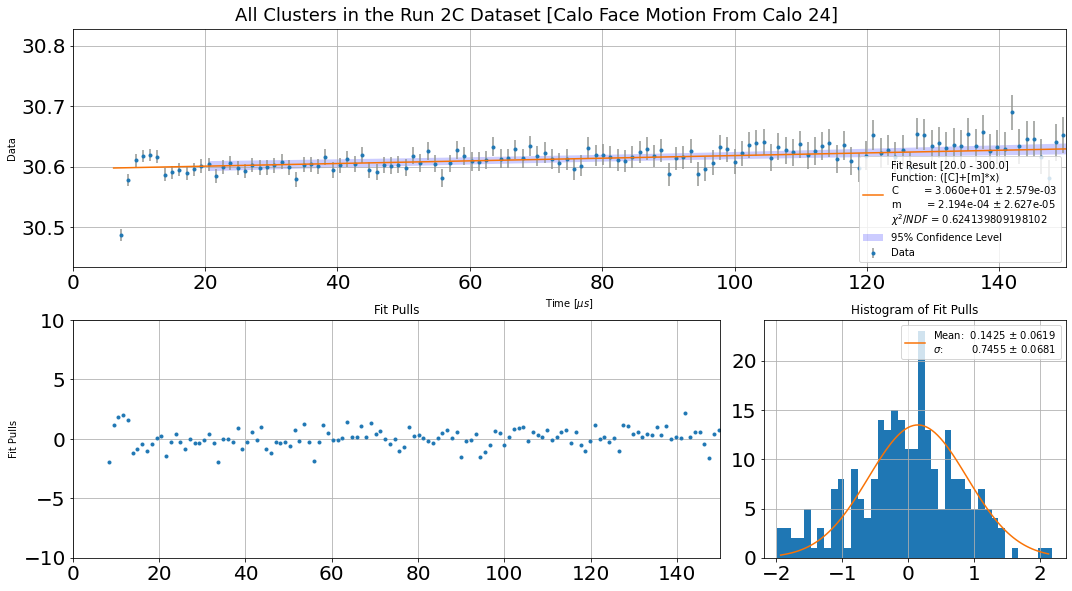

In [43]:
fig,ax = fitresult.draw("All Clusters in the "+name+" Dataset [Calo Face Motion From Calo "+str(calo)+"]", 
                        yrange=[None, [-10,10]], fmti=".")
#ax[0].set_ylim(-2,2)
#ax[0].set_xlim(0,50)
for i in range(2):
    ax[i].set_xlim(0,150)
ax[0].set_xlabel(r"Time [$\mu s$]")


plt.show()

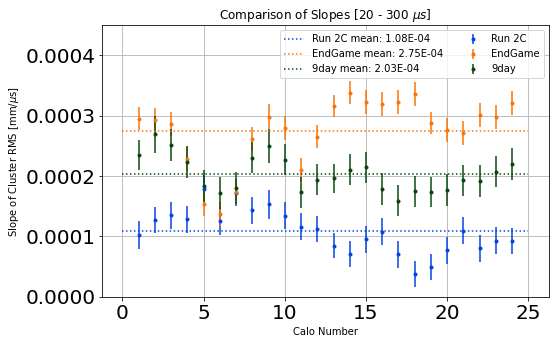

In [39]:
fig, ax = plt.subplots(figsize=(8,5))
colors = ['xkcd:blue', 'xkcd:orange', 'xkcd:forest green']
for i, name in enumerate(datasetslopes):
    slopes = datasetslopes[name]
    color=colors[i]
    plt.errorbar([x for x in range(1,25)], slopes, yerr=datasetslopeErrs[name], fmt=".",label=name, color=color)
    mean = np.mean(slopes)
    plt.plot([0,25], [mean,mean], ":", label=name+" mean: "+str(format(mean, "2.2E")), color=color)
#plt.errorbar([x for x in range(1,25)], slopes_eg, yerr=slopeErrs_eg, fmt=".",label="EndGame")
plt.grid()
plt.title(r"Comparison of Slopes ["+str(tlow)+" - "+str(thigh)+r" $\mu s$]")
plt.xlabel("Calo Number")
plt.ylabel(r"Slope of Cluster RMS [mm/$\mu$s]")
plt.legend(ncol=2)
# fit.f.SetParameters(0.0001,0.00001, 0.25,0)
# fit.drawFitResult(ax)
plt.ylim(0,0.00045)
plt.show()

In [40]:
func = r.TF1("func","[0] + [1]*TMath::Sin([2]*x + [3])", 0, 25, 4)
func.SetParNames("C", "A", "$\omega$", "$\phi$")
func.SetParameters(0.0001,0.00001, 0.25,0)
name="Run 2C"
#name="EndGame"
fit = fitVector([x for x in range(1,25)], datasetslopes[name], func, yerr=datasetslopeErrs[name])

<>:2: DeprecationWarning: invalid escape sequence \o
<>:2: DeprecationWarning: invalid escape sequence \p


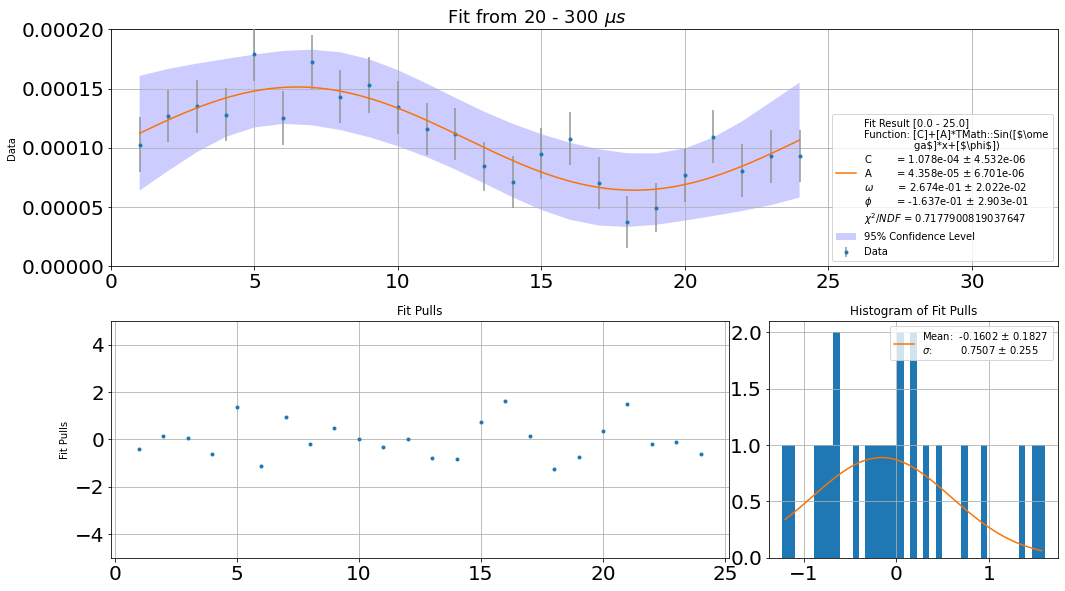

In [41]:
fig,ax = fit.draw(fmti=".")
ax[0].set_ylim(0, 0.0002)
ax[1].set_ylim(-5,5)
ax[0].set_xlim(0,33)
plt.suptitle("Fit from "+str(tlow)+" - "+str(thigh)+r" $\mu s$",y=1.02, fontsize=18)
plt.show()